<br>

<center><img src="https://keras.io/img/logo.png"></center>


<br>

***
<h4 style="text-align: left">Project:</h4>

<center><h1 style="color: rgb(0, 94, 25);">Keras</h1></center>
<center><h2>Timeseries anomaly detection using an Autoencoder</h2></center>

***
    
*__<div style="text-align: right"> Author: Denis Sarf </div>__*


### Table of Contents

***
* [1.Project task](#Project_task)
* [2.Introduction](#Introduction)
    * [2.1 Overview of Keras](#Overview)
    * [2.2 Keras Models](#Models)
    * [2.3 Install Keras and Tensorflow](#Installation)
* [3. Project Implementation](#Implementation)
    * [3.1 Project Introduction](#Pr_Introduction)
    * [3.2 Import libraries](#Import)
    * [3.3 Load the data](#data)
        * [3.3.1 Non-Anomaly Data](#Non-Anomaly)
        * [3.3.2 Anomaly Data](#Anomaly)
    * [3.4 Prepare training data](#training_data)
    * [3.5 Neural Network](#neural_network)
    * [3.6 Evaluation](#Evaluation)
    * [3.7 Plot anomalies](#Plot_anomalies)
* [4. Conclusion](#Conclusion)
* [References](#References)

## 1.  Project task <a class="anchor" id="Project_task"></a>
***

<div class="alert alert-info"><h5>On the keras website$^{[1]}$, there is an example of time-series anomaly detection$^{[2]}$. Re-create this example in a notebook of your own, explaining the concepts.</h5></div>

## 2.  Introduction <a class="anchor" id="Introduction"></a>
****
### 2.1  Overview of Keras <a class="anchor" id="Overview"></a>

**Keras** is an open-source software library that provides a _Python_ interface for artificial neural networks. **Keras** acts as an interface for the _TensorFlow_ library.  As of version 2.4, only  _TensorFlow_ is supported. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System) and its primary author and maintainer is [François Chollet](https://en.wikipedia.org/wiki/Fran%C3%A7ois_Chollet), a Google engineer.
**Keras** contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code. 
**Keras** allows users to productize deep models on smartphones (iOS and Android), on the web, or on the Java Virtual Machine.It also allows use of distributed training of deep-learning models on clusters of Graphics processing units (GPU) and tensor processing units (TPU)$^{[3]}$.

*Why this name, Keras?*

Keras (κέρας) means horn in Greek. It is a reference to a literary image from ancient Greek and Latin literature, first found in the Odyssey. It's a play on the words κέρας (horn) / κραίνω (fulfil), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).
Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

**Keras** is$^{[4]}$:
- _Simple_ - but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.
- _Flexible_ - Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.
- _Powerful_ - Keras provides industry-strength performance and scalability: it is used by organizations and companies including _NASA_, _YouTube_, or _Waymo_.

**Benefits**$^{[5]}$.
Keras is highly powerful and dynamic framework and comes up with the following advantages

- Larger community support.

- Easy to test.

- Keras neural networks are written in _Python_ which makes things simpler.

- Keras supports both convolution and recurrent networks.

- Deep learning models are discrete components, so that, you can combine into many ways.

A very useful [**Keras cheat sheet**](https://res.cloudinary.com/dyd911kmh/image/upload/v1660903348/Keras_Cheat_Sheet_gssmi8.pdf) that shows the six steps you need to follow to create neural networks in Python, with code examples.



[**Pros and Cons of Keras**](https://techvidvan.com/tutorials/advantages-drawbacks-of-keras/). Before getting started with Keras, it is important to know the advantages and disadvantages of Keras.

<br>

<center><img src="https://techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/09/Pros-Cons-of-Keras-for-TV.jpg"></center>

<br>

### 2.2  Keras Models <a class="anchor" id="Models"></a>

A **Keras** model is a data structure for how we stack the layers of our neural network. We can stack the layers of our neural network in basically three different ways$^{[6]}$: 
+ [Sequential](https://www.tensorflow.org/guide/keras/sequential_model)
+ [Functional](https://www.tensorflow.org/guide/keras/functional) 
+ [Subclass](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

<center><img src="https://miro.medium.com/max/720/1*WzwKtnA0LEhiCGdWTTpLaA.webp"></center>

**Sequential Model (API)**: It is based on the concept of a sequence of layers, this is the most notorious and elementary part of Keras. It supports designing models layer-by-layer for complex problems with the limitation that _Sequential API_ doesn’t build models that share layers or exhibit multiple inputs and outputs. A sequential model can be created by simply calling *Sequential()*

**Functional API**: It is the most popular method to build Keras models. It can do everything that the *Sequential API* can do. Also, it allows multiple inputs, multiple outputs, branching, and layer sharing. It is a clean and easy-to-use method, and it still allows a good level of customization flexibility. The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So, the functional API is a way to build layer graphs.

**Subclass model**: Inside Keras, the Model class is the root class used to define a model architecture. Since Keras utilizes object-oriented programming, we can actually subclass the Model class and then insert our architecture definition. Model subclassing is for advanced-level developers who need full control over their model, layer, and training process.
Model subclassing is fully-customizable and enables you to implement your own custom forward pass of the model.
However, this flexibility and customization come at a cost — model subclassing is way harder to utilize than the Sequential API or Functional API and mainly used by researchers.

### 2.3  Install Keras and Tensorflow$^{[7]}$ <a class="anchor" id="Installation"></a>

Instead of `pip` installing each package separately, the recommended approach is to install **Keras** as part of the **TensorFlow** installation. When you install **TensorFlow 2.0+**, **Keras** will be automatically installed as well.

**TensorFlow** can be run on three different processor platforms, the main difference being the speed at which your neural network is trained. Each platform has different hardware requirements and offers different performance:
- CPU – any modern computer can run this version, but it offers the slowest training speeds.
- TPU – only available currently on Google’s Colaboratory (Colab) platform, Tensor Processing Units (TPUs) offer the highest training speeds.
- GPU – most high end computers feature a separate Graphics Processing Unit (GPU) from Nvidia or AMD that offer training speeds much faster than CPUs, but not as fast as TPUs. 

To install **TensorFlow** we can run the following command:

```pip install tensorflow```

##### Update Tensorflow and Keras Using Pip

Installed **TensorFlow** and **Keras**, they can be updated by running the following command:

```pip install -U tensorflow```

We can check your **TensorFlow** installation with the following command:

In [1]:
# Check installed TensorFlow package version.
import tensorflow as tf; print(tf.__version__)

2022-12-29 18:18:19.307439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 18:18:20.814011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-29 18:18:20.814390: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-29 18:18:32.735161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

2.11.0


## 3.  Project Implementation <a class="anchor" id="Implementation"></a>
***

### 3.1 Project Introduction <a class="anchor" id="Pr_Introduction"></a>
***
##### Time Series Data
Time Series is a sequence of numerical data collected at different points in time in successive order. This is not cross-sectional data. This is an observation of the value of a variable at different times.

##### Anomaly Detection in Time Series Data
Anomaly Detection in the data mining field is the identification of the data of a variable or events that do not follow a certain pattern. Anomaly detection helps to identify the unexpected behaviour of the data with time so that businesses and companies can make strategies to overcome the situation. It also helps the firms to detect the error that is going to happen at a particular time, or it helps to learn from past histories of data that showed unusual behaviour.
Applying machine learning in anomaly detection helps to increase the speed of execution. The machine learning algorithm’s implementation helps companies to find simple and effective approaches for detecting anomalies. Since machine learning algorithms are able to learn from data and make predictions so applying these algorithms in anomaly detection of time series data carries a huge impact on its performance$^{[8]}$.

*Anomaly* is a popular term that refers to something irregular. In statistics, anomalies are often referred to as *outliers* – infrequent or unexpected events in a data collection. If the distribution of the dataset is approximately normal then anomalies would be all those data points that are 2 standard deviations from the mean.


### 3.2 Import libraries <a class="anchor" id="Import"></a>

After installing TensorFlow and Keras, we need to import the required libraries

In [2]:
# Importing the Keras library.
import tensorflow.keras as keras

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like _MATLAB_. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes$^{[9]}$.

In [3]:
# Import the matplotlib.
import matplotlib.pyplot as plt

_NumPy_, which stands for _Numerical Python_, is a scientific computing library built on top of the _Python_ programming language.
The most common way to import _NumPy_ into your _Python_ environment is to use the following syntax: `import numpy as np`
The as `np` portion of the code then tells _Python_ to give _NumPy_ the alias of `np`. This allows you to use _NumPy_ functions by simply typing `np.function_name` rather than numpy$^{[10]}$.

In [4]:
# Import the numpy package.
import numpy as np

_pandas_ is an open source data analysis library built on top of the Python programming language. _pandas_ provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data simple and intuitive$^{[11]}$.

The most common way to import pandas into your Python environment is to use the following syntax:```import pandas as pd```

In [5]:
# Import pandas.
import pandas as pd

The main idea of `seaborn` is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

The `set_theme()`, which is the preferred interface.

**This function may be removed in the future$^{[12]}$.**


In [6]:
# Import pandas.
import seaborn as sns
# Set preferred interface.
sns.set()

### 3.3 Load the data <a class="anchor" id="data"></a>
Keras models accept three types of inputs:
- **[NumPy Arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html)** is a Python-based library. This is a good option if your data fits in memory.
- **[TensorFlow dataset objects](https://www.tensorflow.org/guide/data)**. This is a high performance option and is more suitable for data sets that do not fit in memory.
- **Python generators** that produce batches of data (for example, custom subclasses of the keras.utils.Sequence class).

We will use the [Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/boltzmannbrain/nab) dataset. It provides artificial time series data containing labeled anomalous periods of behavior.
NAB is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It comprises over 50 labelled real-world and artificial time-series data files plus a novel scoring mechanism designed for real-time applications. The data and code are fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms: [github.com/numenta/NAB](https://github.com/numenta/NAB).

In [7]:
# The Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

#### 3.3.1 Non-Anomaly Data <a class="anchor" id="Non-Anomaly"></a>
***
First, we take the non-anomaly data and see what it looks like.

We will use `pd.read_csv`$^{[13]}$ to read a comma-separated values (CSV) file into DataFrame.

The CSV files have 2 columns **timestamp** and **value**.

In [8]:
# Get data from CSV file using 'pd.read_csv'. 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

The `DataFrame.head(n=5)` returns the first `n` rows. This is useful for quick testing if your object has the correct data type in it. If the parameter `n` is not set then it returns by default the first **5** rows

In [9]:
# Print first 5 rows.
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


<a id="describe"></a>
To check the DataFrame it will be useful to use ``describe()`` method of pandas.
The ``describe()`` method returns a description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains this information for each column: **count** - The number of not-empty values. **mean** - The average (mean) value.

In [10]:
# Check the info of dataframe.
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The `shape` returns a tuple with the number of rows, and the number of columns for the data in the DataFrame. The `ndim` which gives the number of dimensions in our data.

In [11]:
# Check rows and columns.
df_small_noise.shape

(4032, 1)

In [12]:
# Check the number of dimensions.
df_small_noise.ndim

2

The `iloc` indexer is used for integer-location-based indexing/selection by position.

In [13]:
# Check the first element from dataframe.
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [14]:
# Take the first element from 'value' column.
df_small_noise.iloc[0]['value']

18.3249185392

In [15]:
# Take the first element from the value element.
df_small_noise.iloc[0].values[0]

18.3249185392

<a id="plot"></a>
The `plot()` function is used to draw points in a diagram and, the `plot()` draws a line from point to point by default. The function takes parameters for specifying points in the diagram.We are going to create a plot from our data.

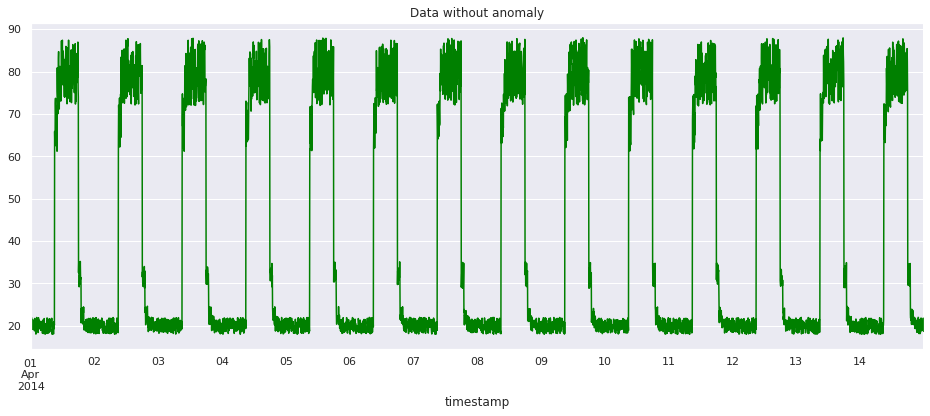

In [16]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16,6))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax,
                   title='Data without anomaly', color='Green');

#### 3.3.2 Anomaly Data <a class="anchor" id="Anomaly"></a>
***
The next, we take the with-anomaly data and see what it looks like.

In [17]:
# Create 'df_daily_jumpsup' variable and take anomalous data.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [18]:
# Print first 7 rows.
df_daily_jumpsup.head(7)

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
2014-04-01 00:25:00,19.923126
2014-04-01 00:30:00,21.698404


Checking some general information by using the [describe()](#describe) function

In [19]:
# Check the info of dataframe.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [20]:
# Check rows and columns.
df_daily_jumpsup.shape

(4032, 1)

In [21]:
# Take the first element from 'value' column.
df_daily_jumpsup.iloc[0]['value']

19.761251903

Create the [plot()](#plot) with data that has an anomaly. On this chart, the anomalous peak is very clearly visible, which is between _11_ and _12_ and is twice as high as other waves.

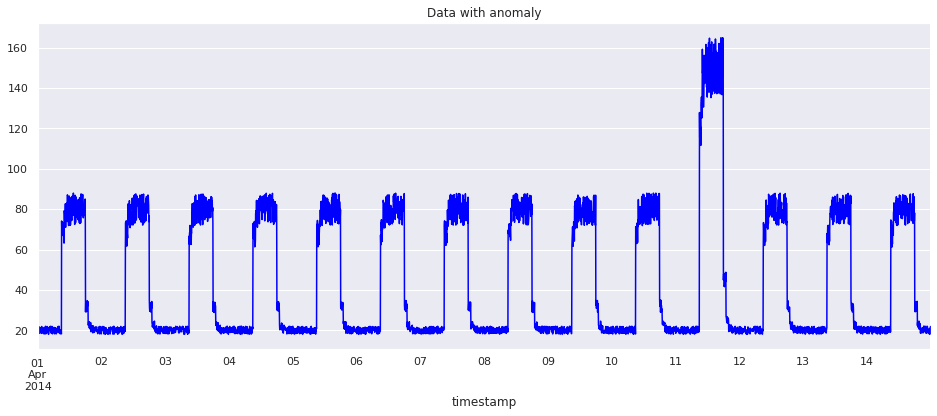

In [22]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16,6))
# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax, 
                     title='Data with anomaly', color='blue');

A [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

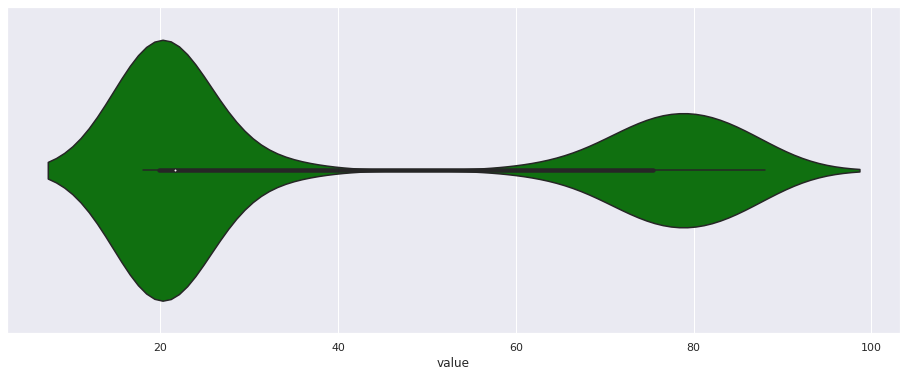

In [23]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Create a violin plot for data without anomalies.
sns.violinplot(x=df_small_noise["value"], color='green', scale="count");

When comparing these two violin plots, we can notice anomalies in the second violin plot which is highlighted in yellow.

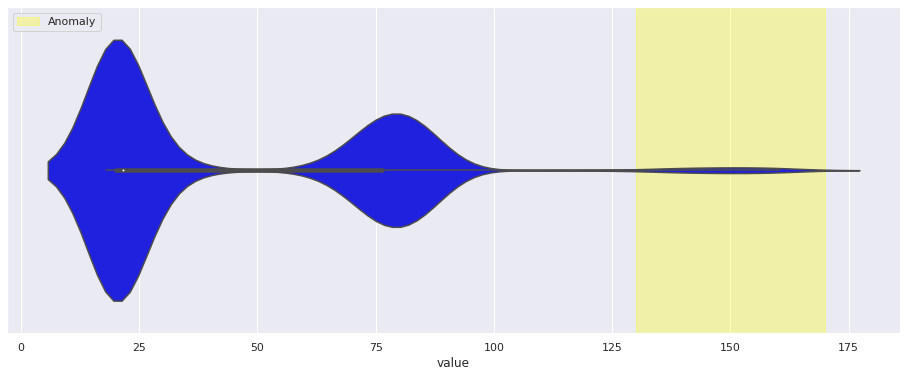

In [24]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16,6))
# To highlight specific x-value ranges.
ax.axvspan(130, 170, label="Anomaly", color="yellow", alpha=0.3)
# Create a violin plot for data with anomalies.
sns.violinplot(x=df_daily_jumpsup["value"], color='blue', scale="count")
# "legend()" is used to place the legend on the axes.
ax.legend();

**Create plot for both data frames.**

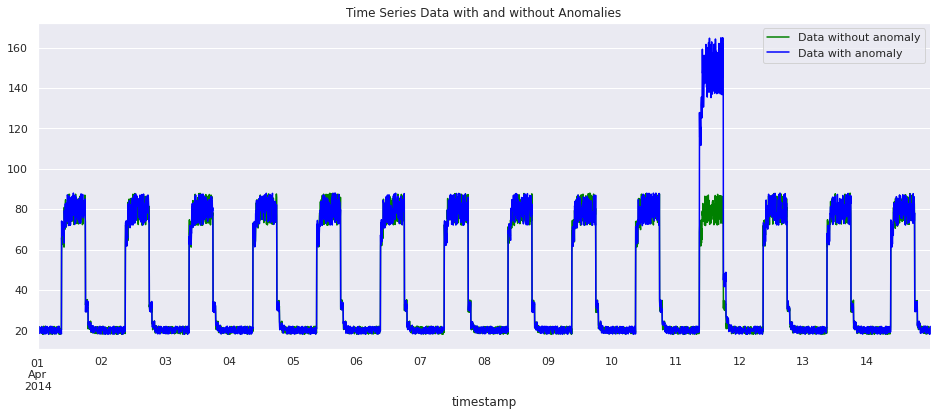

In [25]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16,6))
# Use pandas to plot data frame.
df_small_noise['value'].plot(legend=False, label="Data without anomaly", ax=ax, color='green')
df_daily_jumpsup['value'].plot(legend=False, label="Data with anomaly", ax=ax, color='blue')
# Add a title.
plt.title('Time Series Data with and without Anomalies')
# "legend()" is used to place the legend on the axes.
ax.legend();

### 3.4 Prepare training data <a class="anchor" id="training_data"></a>
***

The data is ready for preprocessing, and this means:$^{[14]}$
- Rescaling the data to small values (in general, input values to a neural network should be close to zero -- typically we expect either data with zero-mean and unit-variance, or data in the [0, 1] range

The [`DataFrame.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) returns the mean of the values over the requested axis. Also the method returns a scalar value which is the mean value of all the observations in the dataframe and If the method is applied on a pandas dataframe object, then the method returns a pandas series object which contains the mean of the values over the specified axis.

In [26]:
# Get mean of non-anomaly data.
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

The `std()` is for calculating the standard deviation of the given set of numbers, DataFrame, column, and rows.

In [27]:
# Get the standard deviation of data.
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

Make a calculation to get the number of training samples.
For this calculation, we take the value from the dataset, subtract the mean of the dataset and divide it all by the standard deviation of the data

In [28]:
# Get the number of training samples.
df_train_vals = (df_small_noise - train_mean) / train_std

In [29]:
# Check calculated data.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


We do the calculation that was done above in two parts;
- the first part, we do the subtraction which is in brackets `(df_small_noise - train_mean)`
- the second part we do the division. 

At the same time add the result to the table with the created a new column.

In [30]:
# Calculate the first part, and create a new 'less_mean' column.
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()

In [31]:
# Calculate the second part, and create a new 'div_std' column.
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [32]:
# Check the dataset with added columns.
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [33]:
# Get mean for all 3 columns.
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.43835333580657, 5.018912974813406e-15, 1.691768418476429e-16)

In [34]:
# Get the standard deviation of data for all 3 columns.
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.07712228126252, 28.077122281262515, 0.9999999999999999)

Create the [plot()](#plot) with training samples data. 

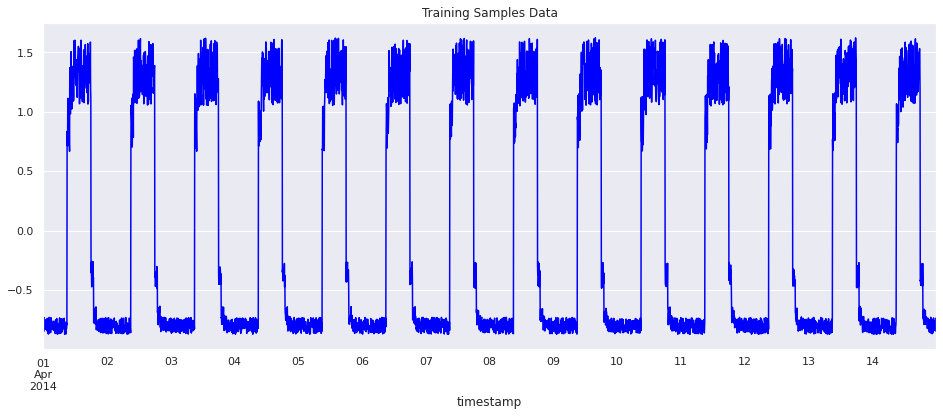

In [35]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16,6))
# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax,
                  title='Training Samples Data', color='blue');

In [36]:
# Check rows and columns of the training data.
df_train_vals.shape

(4032, 1)

The `window_size` is the number of samples that are used to predict the next sample. We have a value for every **5** mins for **14** days.
- timesteps per day: <h3>$$24 * 60 / 5 = 288$$</h3>
- data points in total: <h3>$$288 * 14 = 4032$$</h3>

In our training data, we use **288** samples to predict the next sample.

In [37]:
# Window size. 
window_size = 288

In [38]:
# Create a function that generates training 
# sequences for use in the model.
def windows(vals, N=window_size):
  # Create a list. 
  L = []
  # Loop through the given values.
  for i in range(len(vals) - N + 1):
    # Add array to the "L" list
    L.append(vals[i:i+N])
  # Stack, the stack() creates a new array 
#that has 1 more dimension than the input arrays.
  return np.stack(L)

In [39]:
# Run a function to generate training data.
x_train = windows(df_train_vals)

In [40]:
# Check first and last values of training data by index.
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [41]:
# Check first and last values of training data by iloc.
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [42]:
# Check how many rows and columns are in the dataframe.
x_train.shape

(3745, 288, 1)

In [43]:
# Get elements from 'value' column.
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [44]:
# Get the first element from 'value' column.
df_train_vals['value'].values[0]

-0.8588285706437534

In [45]:
# Get the last element from 'value' column.
df_train_vals['value'].values[-1]

-0.8460885959869234

The [`flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) returns a copy of the array merged into one dimension.

In [46]:
# Get array in one dimension.
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

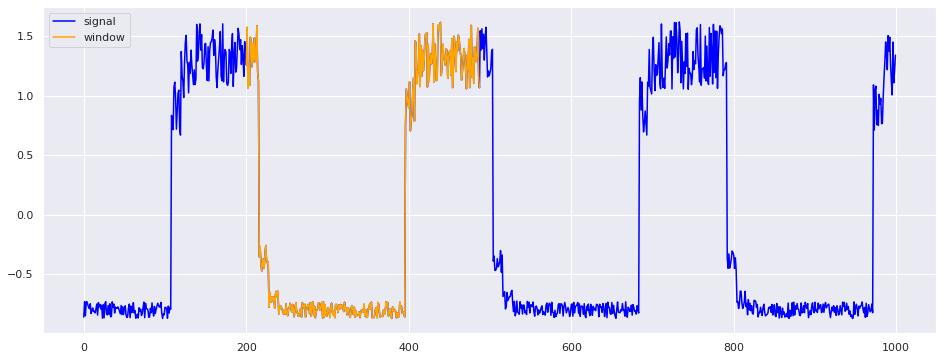

In [47]:
# Make a test with different  windows number.

# Window size.
window_no = 200

# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))

# "y" values from df_train_vals, take the first 1000 values.
y = df_train_vals['value'].values[:1000]

# Create a plot with x values by the same interval as the y values.
ax.plot(np.arange(y.shape[0]), y, label='signal', color='blue')

# The first window.
w = x_train[window_no].flatten()

# Create a plot.
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window', color='orange')

# "legend()" is used to place the legend on the axes.
ax.legend();

### 3.5 Neural Network <a class="anchor" id="neural_network"></a>
***

[_Where does “Neural” comes from ?_](https://blog.ovhcloud.com/what-does-training-neural-networks-mean/)

As we know, a biological neuron is composed of multiple dendrites, a nucleus and a axon (you can learn it in biology class). When a stimuli is sent to the brain, it is received through the synapse located at the extremity of the dendrite.
When a stimuli arrives at the brain it is transmitted to the neuron via the synaptic receptors which adjust the strength of the signal sent to the nucleus. Thus the combination of all these signals takes place in the nucleus. After processing all these signals, the nucleus will emit an output signal through its single axon. The axon will then stream this signal to several other downstream neurons via its axon terminations. Thus a neuron analysis is pushed in the subsequent layers of neurons.

On the other hand, artificial neural networks are built on the principle of bio-mimicry. External stimuli (the data), whose signal strength is adjusted by the neuronal weights (remember the synapse, circulates to the neuron (place where the mathematical calculation will happen) via the dendrites. The result of the calculation – called the output – is then re-transmitted (via the axon) to several other neurons and then subsequent layers are combined, and so on.

Therefore, their is a clear parallel between biological neurons and artificial neural networks as presented in the figure below.

<br>

<center><img src="Img/neuron.png"></center>

<br>

The Artificial Neural Network Training
To build a good Artificial Neural Network (ANN), to prepare for this process, you will need the following:

- Artificial Neurons (processing node) composed of:
    - (many) input neuron(s) connection(s) (dendrites)
    - a computation unit (nucleus) composed of:
        - a linear function (**ax+b**)
        - an activation function (equivalent to the the synapse)
    - an output (axon)

Models in Keras are defined as a sequence of layers.
Each neural network is built on the basis of layers. The Layers API offers a complete set of tools for building neural network architectures. The Layers API contains methods for creating individual layers with custom weights and initializers in the Base Layer class.


In [48]:
# Check how many rows and columns are in the dataframe.
x_train.shape

(3745, 288, 1)

In [49]:
x_train.shape[1], x_train.shape[2]

(288, 1)

**Create a Sequential model by passing a list of layers to the Sequential constructor.**

[**layers.Input()**](https://keras.io/api/layers/core_layers/input/) is used to instantiate a Keras tensor which allows us to build a Keras model just by knowing the model's input and output.
- [Parameters](https://www.tensorflow.org/api_docs/python/tf/keras/Input#args):
    - **shape**: A shape tuple (integers), not including the batch size. For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors. Elements of this tuple can be None; 'None' elements represent dimensions where the shape is not known.
 
[**layers.Conv1D()**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.
- [Parameters](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D#args):
    - **filters**: an integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    - **kernel_size**: an integer specifying the length of the one-dimensional convolution window.
    - **padding**: _"same"_ results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    - **strides**: an integer specifies the stride length of the convolution. 
    - **activation**: activation function to use. If you don't specify anything, no activation is applied. _"relu"_ - applies the rectified linear unit activation function.


[Simple 1D convolutional neural network](https://www.researchgate.net/figure/Simple-1D-convolutional-neural-network-CNN-architecture-with-two-convolutional-layers_fig1_344229502) (CNN) architecture with two convolutional layers.

<center><img src="Img/1D_convolutional.png"></center>

Each of the convolutional stages in the picture shows a set of learnable convolutional filters followed
by a pooling operation. These convolutional filters act to extract the high-level features from a supplied input by convolving a set of weights with the input and applying a non-linear activation function. The outputs of this are then fed into the union operation
which reduces the spatial size of the features extracted using convolutional filters, while emphasizing dominant traits learned by each filter. As the input passes through the convolution steps, the network learns more features specific to the problem.

[**layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/) layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
- [Parameters](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout#args):
    - **rate**: float between 0 and 1. Fraction of the input units to drop.

Towards better regularisation and avoiding overfitting, a dropout layer with a _20%_ dropping rate is adopted. On each iteration, we randomly shut down some neurons (units) on each layer and don’t use those neurons in both forward propagation and back-propagation. Since the units that will be dropped out on each iteration will be random, the learning algorithm will have no idea which neurons will be shut down on every iteration; therefore, forcing the learning algorithm to spread out the weights and not focus on some specific features (units). 

<center><img src="Img/dropout.png"></center>

<br>


[**layers.Conv1DTranspose()**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose) is used to apply the transposed 1D convolution operation, also known as deconvolution, on data.
- [Parameters](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose#args):
    - **filters**: an integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    - **kernel_size**: an integer specifying the length of the one-dimensional convolution window.
    - **padding**: _"same"_ results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    - **strides**: an integer specifies the stride length of the convolution. 
    - **activation**: activation function to use. If you don't specify anything, no activation is applied. _"relu"_ - applies the rectified linear unit activation function.

To reverse the reduction in resolution and increase it back to its original size, a [transpose convolution is introduced](https://medium.com/jun94-devpblog/dl-12-unsampling-unpooling-and-transpose-convolution-831dc53687ce). As an example, we have 2⨯1 input, 3⨯1 filter, and transpose convolution with the stride of 2. Then the output of the operation has the size of 5⨯1, which is obtained by copying each input value weighted by the filter, summing the overlaps. The filter parameters, x, y, and z, are updated in the backpropagation step, and this is why the transpose convolution is a learnable upsampling approach.

<center><img src="Img/conv1Dtranspose.png"></center>


In [50]:
# Create layers.
layers = [
  # Create an instance with shape 288, 1.
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # Create a convolution kernel that is convolved with the layer input
    # with filters=32
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # The percent of nodes (neurons) to drop out is defined by the number. 
    #The value of 0.2 means 20 percent. 
  keras.layers.Dropout(rate=0.2),
  # Create a convolution kernel that is convolved with the layer input
    # with filters=16
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Apply the transposed one-dimensional convolution operation.
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # The percent of nodes (neurons) to drop out is defined by the number. 
    #The value of 0.2 means 20 percent. 
  keras.layers.Dropout(rate=0.2),
  # Apply the transposed one-dimensional convolution operation.
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Apply the transposed one-dimensional convolution operation.
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

[**Sequential()**](https://keras.io/guides/sequential_model/) specifies to Keras that we are creating a model sequentially and the output of each layer we add is input to the next layer we specify.

In [51]:
# Define Sequential model.
model = keras.Sequential(layers)

2022-12-29 18:18:57.612263: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-29 18:18:57.612792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tatiden): /proc/driver/nvidia/version does not exist
2022-12-29 18:18:57.623525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[**optimizers.Adam()**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)_(Adaptive Moment Estimation)_ optimizer that implements the Adam algorithm.
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. 
- [Parameters](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam#args_1):
    - **learning_rate**: floating point value, a schedule that is a _tf.keras.optimizers.schedules.LearningRateSchedule_, or a callable that takes no arguments and returns the actual value to use.

Keras Adam Optimizer is the most popular and widely used optimizer for neural network training. The method calculates individual adaptive learning rates for various parameters based on estimates of the first and second moments of the gradients.

The [Adam optimizer](https://www.fast.ai/posts/2018-07-02-adam-weight-decay.html), first introduced in 2014, is at its core a simple and straightforward idea: why use the same learning rate for each parameter when we know that some of them definitely need to be moved farther and faster. Since the square of the recent gradients tells us how much signal we get for each weight, we can simply divide by that to ensure that even the sluggish weights get a chance to shine. Adam takes this idea, and adds a standard approach to momentum.

Adam's method is depicted in the figure with a pink line.

<center><img src="Img/adam_charts.png"></center>

In [52]:
# Create adaptive learning rate optimizer.
optimizer = keras.optimizers.Adam(learning_rate=0.001)

Keras model provides a method, **compile()** to compile the model. [**Compile()**](https://stackoverflow.com/a/47996024) defines the _loss function_, the _optimizer_ and the _metrics_. 

For the compiling the model we must specify some additional parameters to better evaluate the model and to find the best set of weights to map inputs to outputs.


In [53]:
# Compile the model.
model.compile(optimizer=optimizer, loss="mse")

[**model.summary()**](https://www.tensorflow.org/js/guide/models_and_layers) to print a useful summary of the model, which includes:
- Name and type of all layers in the model.
- Output shape for each layer.
- Number of weight parameters of each layer.
- If the model has general topology (discussed below), the inputs each layer receives
- The total number of trainable and non-trainable parameters of the model.

In [54]:
# Print summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

[**model.fit()**](https://github.com/keras-team/keras/tree/v2.11.0/keras/engine/training.py#L1303-L1729) is one of the APIs used to train the model. In contrast, the model is being trained repetitively for the specific number of iterations and epochs specified for the mentioned dataset.

- Parameters:
    - **x** - _x_train_ : Input data.
    - **y** - _x_train_ : Target data.
    - **epochs**: It is an integer number where we specify the epochs we must carry out to train the model. Epoch consists of an iteration for x and y data that are mentioned. 
    - **batch_size**: It is an integer or None, number of samples per gradient update.
    - **validation_split**: It is the float value and can be either 1 or 0, which is the specification of a fraction of training data that will be used for validation.
    - **callbacks**: It is the list of the instances of callbacks that are implemented during training.
        - [**callbacks.EarlyStopping()**](https://keras.io/api/callbacks/early_stopping/): Stop training when a monitored metric has stopped improving.
        - Parameters:
            - **monitor**: Quantity to be monitored.
            - **patience**: Number of epochs with no improvement after which training will be stopped.
            - **mode**: In _min_ mode, training will stop when the quantity monitored has stopped decreasing.
            
Model fitting means training our model with data, i.e. feeding data into the model so that the model can update its internal math variables and prepare for predictions. Here we are using the data that we have split i.e. the training data for model fitting.
When fitting, we can pass various parameters such as _batch_size_, _epochs_, _verbose_, _validation_split_, _callbacks_ and so on.

The _epochs_ of **50** and _batch_size_ of **128** mean the model uses **128** datapoints to update the weights in each iteration, and the model will go through the whole training dataset **50** times.

In [55]:
#  Train the model with `model.fit()`
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 6s 110ms/step - loss: 0.6010 - val_loss: 0.3754
Epoch 2/50
27/27 [==============================] - 2s 72ms/step - loss: 0.2190 - val_loss: 0.0506
Epoch 3/50
27/27 [==============================] - 2s 64ms/step - loss: 0.0671 - val_loss: 0.0384
Epoch 4/50
27/27 [==============================] - 2s 76ms/step - loss: 0.0517 - val_loss: 0.0325
Epoch 5/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0446 - val_loss: 0.0294
Epoch 6/50
27/27 [==============================] - 2s 76ms/step - loss: 0.0401 - val_loss: 0.0283
Epoch 7/50
27/27 [==============================] - 2s 73ms/step - loss: 0.0363 - val_loss: 0.0265
Epoch 8/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0331 - val_loss: 0.0273
Epoch 9/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0303 - val_loss: 0.0269
Epoch 10/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0282 - val_loss: 0.0279
Epoch 11

### 3.6 Evaluation <a class="anchor" id="Evaluation"></a>
***
After fitting a model we will to evaluate the model. Here we are using `model.evaluate()` to evaluate the model and it will give us the loss and the accuracy.
Evaluation is a process that helps us check if a model is the best fit for a problem statement. This will help us find the best model that represents the right problem statement and the right data and then determine how well the model will perform in the future. Model evaluation aims to assess the overall accuracy of the model.

The `history.history` returned object holds a record of the _loss values_ and _metric values_ during training:

In [56]:
# Check history loss values.
history.history["loss"]

[0.6010102033615112,
 0.21898166835308075,
 0.06705283373594284,
 0.051702193915843964,
 0.04455478861927986,
 0.040085699409246445,
 0.03627884015440941,
 0.03311812877655029,
 0.03032906912267208,
 0.028238903731107712,
 0.026648519560694695,
 0.02526288665831089]

In [57]:
# Check history val_loss values.
history.history["val_loss"]

[0.3753829002380371,
 0.05055437237024307,
 0.03840620070695877,
 0.032456401735544205,
 0.02944369986653328,
 0.02828722633421421,
 0.0264903511852026,
 0.02733728103339672,
 0.026863306760787964,
 0.02792706899344921,
 0.02823852002620697,
 0.027387436479330063]

In [58]:
# Evaluate the model on the test data using `evaluate`.
results = model.evaluate(x_train, x_train, batch_size=128)
print("Test loss, Test acc:", results)

30/30 [==============================] - 1s 22ms/step - loss: 0.0289
Test loss, Test acc: 0.028861137107014656


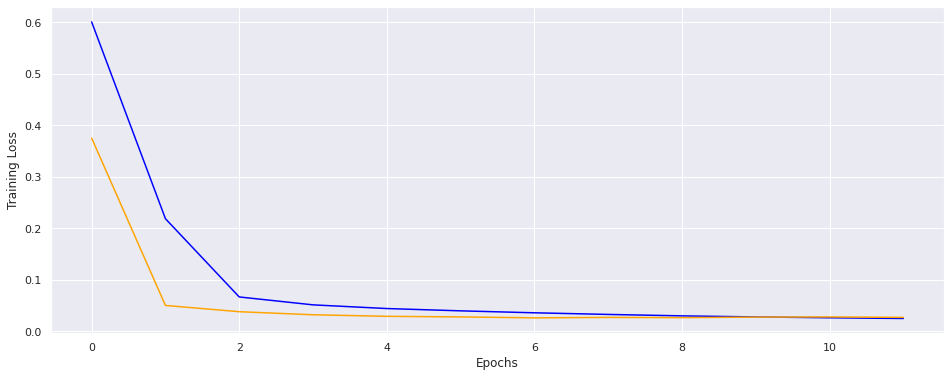

In [83]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Create the first (blue) line with loss values.
ax.plot(history.history["loss"], color='blue')
# Create the second (orange) line with val_loss values.
ax.plot(history.history["val_loss"], color='orange')
# Set x label.
ax.set_xlabel("Epochs")
# Set y label.
ax.set_ylabel("Training Loss");

This chart visualizes the training and validation loss changes during the model fitting. The **X**-axis is the number of epochs, and the **Y**-axis is the loss. We can see that both training and validation losses decrease with the increase of epochs.

[**model.predict()**](https://github.com/keras-team/keras/tree/v2.11.0/keras/engine/training.py#L2172-L2394) generates output predictions for the input samples. _predict()_ helps in strategizing and finalizing the entire model with proper filters that fit well with predict class as per requirement. Prediction is useful in making many models based on classification for efficient analysis. Moreover, it helps in the entire Keras model fabrication and its usage with varied libraries as part of the prediction.

- Parameters:
    - **x** - _x_train_ : Input samples.


In [60]:
# Make probability predictions with the model.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 8ms/step


<a id="mae"></a>
**Let's break down piece by piece the calculation method [(MAE)](https://keras.io/api/losses/regression_losses/):**

- `np.abs(x_train_pred - x_train)` : Calculates the mean of the absolute difference between labels and predictions.
- `axis=1`: The axis along which the cosine similarity is computed (the features axis).
- `np.mean()`: Computes the mean absolute error between labels and predictions.

In [61]:
# Calculate the Mean Absolute Errors (MAE) loss.
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

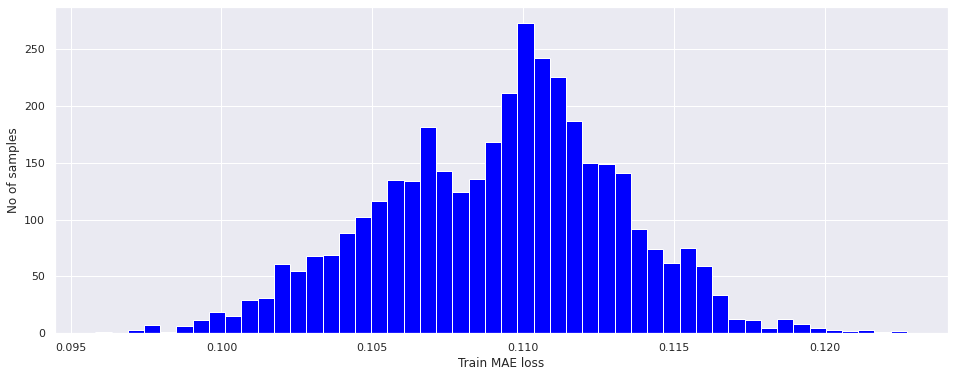

In [62]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Create a histogram with MAE loss data
# with the number of equal-width bins in the range.
ax.hist(train_mae_loss, bins=50, color='blue')
# Set x label.
ax.set_xlabel("Train MAE loss")
# Set y label.
ax.set_ylabel("No of samples");

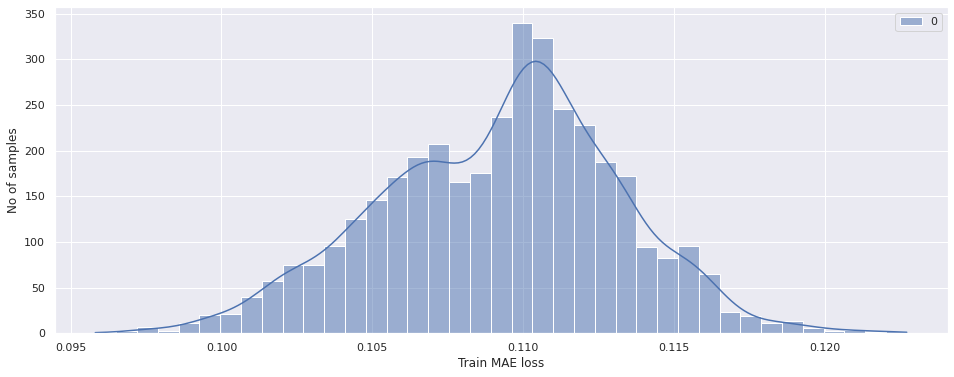

In [63]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Plotting the histogram
sns.histplot(data = train_mae_loss, kde=True)
# Set x label.
ax.set_xlabel("Train MAE loss")
# Set y label.
ax.set_ylabel("No of samples");

In [64]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# Print the loss threshold.
threshold

0.12272896373706921

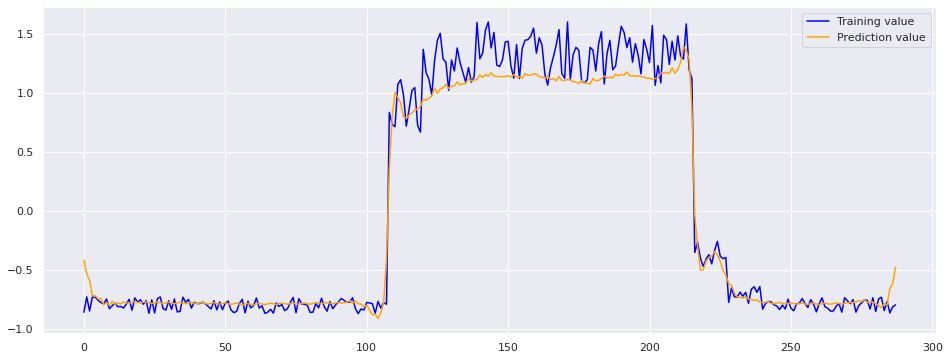

In [65]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Create a plot with training value (blue)
ax.plot(x_train[0], label="Training value", color='blue')
# Create a plot with prediction value (orange)
ax.plot(x_train_pred[0], label="Prediction value", color='orange')
# "legend()" is used to place the legend on the axes.
ax.legend();

**The calculation is as follows:**

The anomaly data (`df_daily_jumpsup`) subtract the mean of the non-anomaly data (`train_mean`) and all this divides into the standard deviation of data (`train_std`).

In [66]:
# Detect anomalies.
df_test_value = (df_daily_jumpsup - train_mean) / train_std

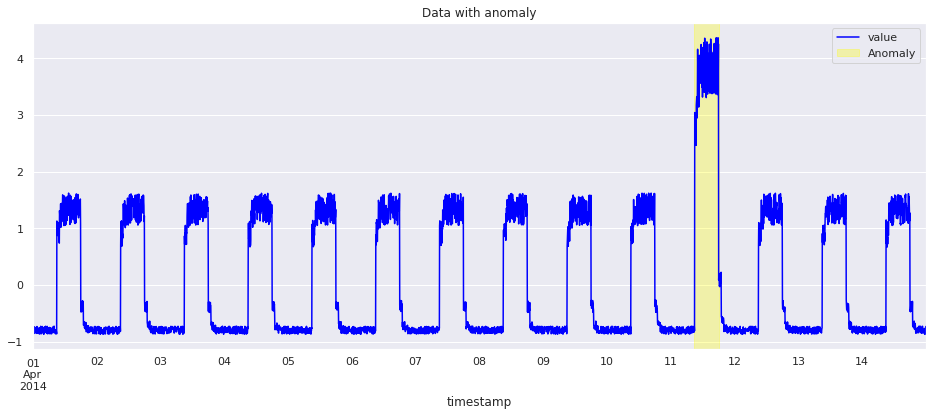

In [67]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))

# Create a plot with anomalies data.
df_test_value.plot(legend=False, ax=ax, 
                  title='Data with anomaly', color='blue')
# To highlight specific x-value(Anomaly) ranges.
ax.axvspan('2014-04-11 08:45:00', '2014-04-11 18:05:00', label="Anomaly", color="yellow", alpha=0.3)
# "legend()" is used to place the legend on the axes.
ax.legend();

In [68]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

# Print test values.
x_test.shape

(3745, 288, 1)

In [69]:
# Make probability predictions for the anomalies data.
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 9ms/step


Calculate the Mean Absolute Errors (MAE) loss for data with anomalies. Explanation of this method [here](#mae).

In [70]:
# Calculate the Mean Absolute Errors (MAE) loss. 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

# Print calculated values.
test_mae_loss

array([[0.10682314],
       [0.10942929],
       [0.11025482],
       ...,
       [0.1100323 ],
       [0.10973003],
       [0.10872163]])

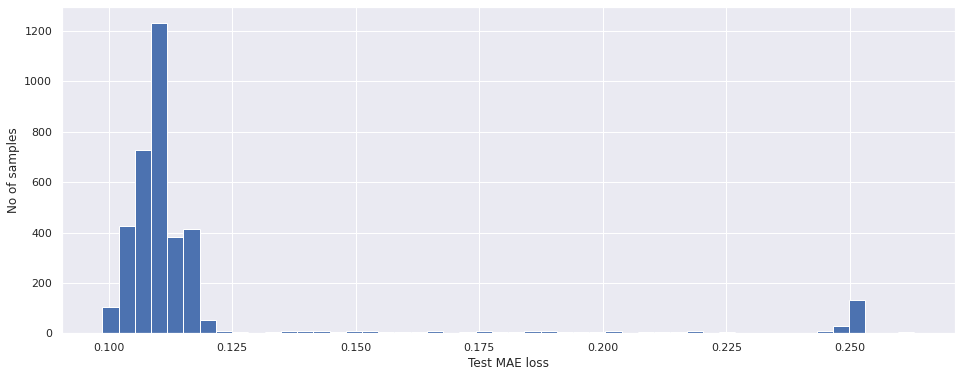

In [71]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Create a histogram with MAE loss data
# with the number of equal-width bins in the range.
ax.hist(test_mae_loss, bins=50)
# Set x label.
ax.set_xlabel("Test MAE loss")
# Set Y label.
ax.set_ylabel("No of samples");

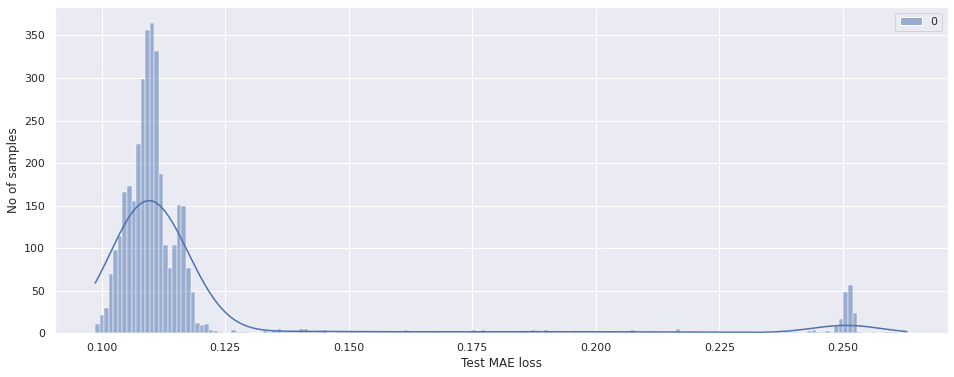

In [72]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))
# Plotting the histogram
sns.histplot(data = test_mae_loss, kde=True)
# Set x label.
ax.set_xlabel("Test MAE loss")
# Set y label.
ax.set_ylabel("No of samples");

In [73]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

394

In [74]:
# Indices of anomalies.
np.where(anomalies)[0]

array([2697, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711,
       2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722,
       2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733,
       2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744,
       2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755,
       2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766,
       2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777,
       2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788,
       2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799,
       2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810,
       2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832,
       2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843,
       2844, 2845, 2846, 2847, 2848, 2849, 2850, 28

### 3.7 Plot Anomalies <a class="anchor" id="Plot_anomalies"></a>
***

We now know the samples of the data which are anomalies. With this, we will find the corresponding timestamps from the original test data. 

We are going to find the range for the loop.
- Making a range: remove the steps from the head of the dataFrame and do the same with the tail of the dataFrame. And the loop will go along this range(287, 3745).

After that we will use the [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) function tests whether all array elements along the mentioned axis evaluate to True.

In [75]:
# Range 
range(window_size - 1, len(df_test_value) - window_size + 1)

range(287, 3745)

In [76]:
# Test the np.all() function
np.all(anomalies[1 - window_size + 1 : 1])

True

In [77]:
# Data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies.
# Create a list.
inds = []
# Loop in range(287, 3745).
for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    # Check if all array elements along a given axis evaluate to True.
    if np.all(anomalies[i - window_size + 1 : i]):
        # Add to the list.
        inds.append(i)

In [78]:
# Check the list of indexes.
inds

[2989,
 2990,
 2991,
 2992,
 2993,
 2994,
 2995,
 2996,
 2997,
 2998,
 2999,
 3000,
 3001,
 3002,
 3003,
 3004,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3011,
 3012,
 3013,
 3014,
 3015,
 3016,
 3017,
 3018,
 3019,
 3020,
 3021,
 3022,
 3023,
 3024,
 3025,
 3026,
 3027,
 3028,
 3029,
 3030,
 3031,
 3032,
 3033,
 3034,
 3035,
 3036,
 3037,
 3038,
 3039,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3046,
 3047,
 3048,
 3049,
 3050,
 3051,
 3052,
 3053,
 3054,
 3055,
 3056,
 3057,
 3058,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3065,
 3066,
 3067,
 3068,
 3069,
 3070,
 3071,
 3072,
 3073,
 3074,
 3075,
 3076,
 3077,
 3078,
 3079,
 3080,
 3081,
 3082,
 3083,
 3084,
 3085,
 3086,
 3087,
 3088,
 3089]

In [79]:
# Indexing for the "inds" list values.
df_subset = df_daily_jumpsup.iloc[inds]

# Print the dataFrame.
df_subset

,value
timestamp,
2014-04-11 09:05:00,115.705719
2014-04-11 09:10:00,122.386410
2014-04-11 09:15:00,127.261178
2014-04-11 09:20:00,121.157997
2014-04-11 09:25:00,120.468468
...,...
2014-04-11 17:05:00,164.936862
2014-04-11 17:10:00,147.929735
2014-04-11 17:15:00,156.787208


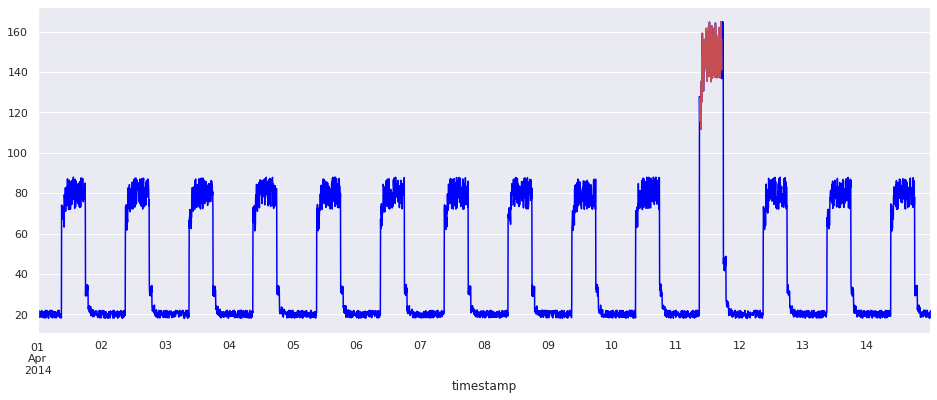

In [80]:
# Create a plot and set the size.
fig, ax = plt.subplots(figsize=(16, 6))

# Create a plot with anomalies data.
df_daily_jumpsup.plot(legend=False, ax=ax, color='blue')

# Create a plot and highlight the anomaly, 
# highlight this peak in red.
df_subset.plot(legend=False, ax=ax, color="r");

## 4.  Conclusion <a class="anchor" id="Conclusion"></a>
***

In this project about *“Keras - Timeseries anomaly detection using an Autoencoder”*. we have worked with Keras in Python, which is a Python Machine Learning library that allows us to abstract from the difficulties of implementing a low-level network. 
Installing Keras in Python is easy. The easiest way to get started with Keras is to install Keras - the default Keras engine, TensorFlow, and the standard library installation.
To get to know Keras, we can use examples from the official [Keras documentation](https://keras.io/). In this project, we took the example *“Keras - Timeseries anomaly detection using an Autoencoder”* and walked through how it works step by step.


## References<a class="anchor" id="References"></a>
***
[1] https://keras.io/

[2] https://keras.io/examples/timeseries/timeseries_anomaly_detection/

[3] https://en.wikipedia.org/wiki/Keras

[4] https://keras.io/about/

[5] https://www.tutorialspoint.com/keras/keras_introduction.htm

[6] https://medium.com/@antika.das/keras-models-cnn-functional-vs-sequential-mnist-data-set-d7a19dae9cb7

[7] https://www.activestate.com/resources/quick-reads/how-to-install-keras-and-tensorflow/

[8] https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

[9] https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

[10] https://numpy.org/doc/stable/reference/routines.math.html

[11] https://pandas.pydata.org/docs/user_guide/10min.html

[12] https://seaborn.pydata.org/generated/seaborn.set.html

[13] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

[14] https://keras.io/getting_started/intro_to_keras_for_engineers/

[15] https://www.researchgate.net/figure/Simple-1D-convolutional-neural-network-CNN-architecture-with-two-convolutional-layers_fig1_344229502


##### <center><h2 style="color: rgb(0, 94, 25);">End</h2></center>